<a href="https://colab.research.google.com/github/vicaleram/DSPS_VRamirez/blob/master/HW9/HiggsBosons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


## Downloading the Higgs' Boson data

In [3]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
#os.chdir('/root')
#mkdir .kaggle

In [0]:
#os.chdir('/content/drive/My Drive/')

In [0]:
#mv kaggle.json /root/.kaggle/

In [0]:
#!chmod 600 kaggle.json

In [0]:
#envs = json.load(open("kaggle.json", "r"))
#os.environ["KAGGLE_USERNAME"] = envs['username']
#os.environ["KAGGLE_KEY"] = envs['key']

In [0]:
#!kaggle datasets list

In [0]:
os.chdir('/content/drive/My Drive/dsps/')
#!mkdir kaggleHiggs

In [0]:
#cd kaggleHiggs

In [0]:
#!kaggle competitions download -c higgs-boson

In [0]:
#!unzip training.zip -d "/content/drive/My Drive/dsps/kaggleHiggs"

In [14]:
cd kaggleHiggs/

/content/drive/My Drive/dsps/kaggleHiggs


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



## Read in the training data

In [15]:
#reading in "training.csv"
higgsdata = pd.read_csv("training.csv")
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [16]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [0]:
#last two columns into numpy array (needed for sklearn split)
weights = higgsdata['Weight'].to_numpy()
labels = higgsdata['Label'].to_numpy()

#removing last two columns from higgsdata
higgsdata.drop(labels = ['Weight','Label'], axis = 1, inplace = True)

In [18]:
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [19]:
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [0]:
# leave
from sklearn.model_selection import train_test_split 

In [0]:
htrain, htest, weighttrain, weighttest, labeltrain, labeltest = train_test_split(higgsdata,weights,labels)

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [22]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [23]:
gbt = GradientBoostingClassifier(random_state=0)
print('Parameters currently in use:\n')
print(gbt.get_params())

Parameters currently in use:

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [25]:
rf.fit(htrain.values, labeltrain)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
gbt.fit(htrain.values, labeltrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [27]:
print('RF training score:')
print(round(rf.score(htrain.values,labeltrain),5))
print('RF test score:')
print(round(rf.score(htest.values,labeltest),5))

RF training score:
0.98812
RF test score:
0.82056


In [28]:
print('GBT training score:')
print(round(gbt.score(htrain.values,labeltrain),5))
print('GBT test score:')
print(round(gbt.score(htest.values,labeltest),5))

GBT training score:
0.83461
GBT test score:
0.8311


- Produce a confusion matrix for each model and compare them


 



In [0]:
# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = pl.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


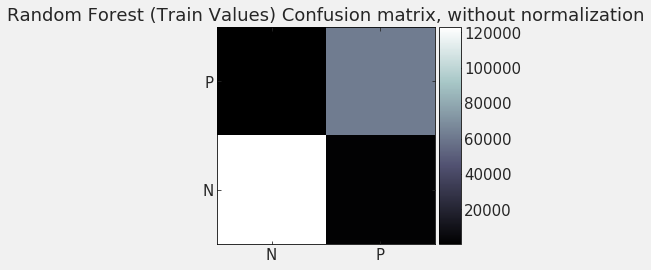

In [30]:
plot_confusion_matrix(rf.predict(htrain.values),labeltrain, title = 'Random Forest (Train Values)')

**Figure 1:** Confusion matrix for our random forest generator, where the y axis represents the true values and the x axis the false values. The lower left coner shows the values for True Negavite and False Negative,and the Upper right corner represents the True Positive and the False Positive. We can observe based on the colors that most of the values are in the True Negative and False Negative cuadrant , followed by the values in the True Positive and False Positive values.

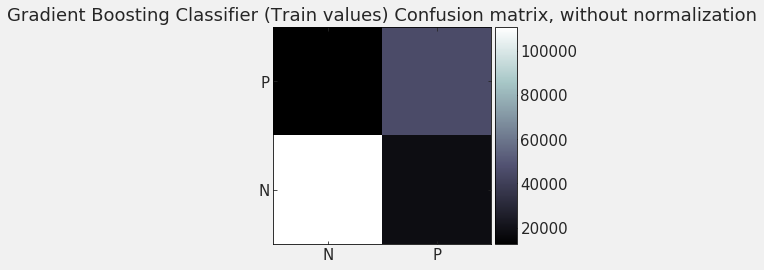

In [31]:
plot_confusion_matrix(gbt.predict(htrain.values),labeltrain, title= 'Gradient Boosting Classifier (Train values)')

**Figure 2:** Confusion matrix for our Gradient Boosting Classifier, using the same train data as in the precvious cinfusin matrix. We observe a very similar behavior as in the previous one, except that in this matrix there are more data points in the True Positive and False positive values.

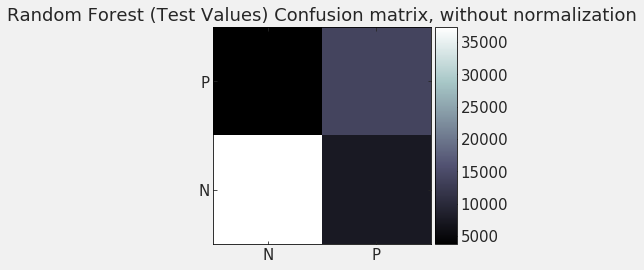

In [53]:
plot_confusion_matrix(rf.predict(htest.values),labeltest, title = 'Random Forest (Test Values)')

**Figure 3:** Confusion matrix for our Random Forest, now using the test data. The result is very similar as the one obtained with the training data.

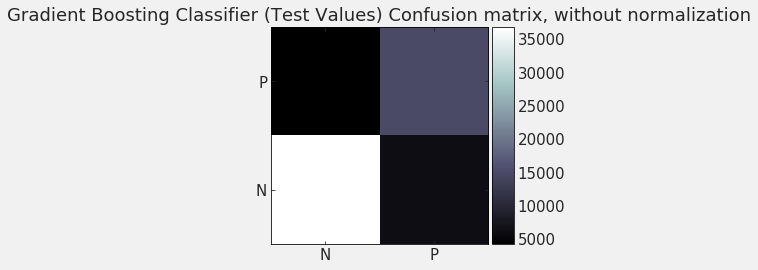

In [33]:
plot_confusion_matrix(gbt.predict(htest.values),labeltest, title= 'Gradient Boosting Classifier (Test Values)')

**Figure 4:** Confusion matrix for our Gradient Boosting Classifier, now using the test data. Just as before the behaviour exhibited is in accordance with the previous matrices.


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
rfR = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
rfR.fit(htrain.values, weighttrain)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [36]:
gbtR = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, random_state = 0)
gbtR.fit(htrain.values, weighttrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [37]:
print('L1 for Random Forest Regressor: {:.3}'.format(np.sum(np.abs(weighttrain - rfR.predict(htrain)))))
print('L1 for Gradient Boosting Regressor: {:.3}'.format(np.sum(np.abs(weighttrain - gbtR.predict(htrain)))))
print('L2 for Random Forest Regressor: {:.3}' .format(np.sum((weighttrain - rfR.predict(htrain.values))**2)))
print('L2 for Gradient Boosting Regressor: {:.3}'.format(np.sum((weighttrain - gbtR.predict(htrain.values))**2)))

L1 for Random Forest Regressor: 1.88e+05
L1 for Gradient Boosting Regressor: 1.58e+05
L2 for Random Forest Regressor: 3.43e+05
L2 for Gradient Boosting Regressor: 2.53e+05


 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [38]:
important_features = rf.feature_importances_
important_columns = np.argsort(important_features)
sorted_columns = important_columns[27:]
sorted_columns

array([14,  3,  2,  1])

In [39]:
higgs_important_feature = higgsdata[higgsdata.columns[sorted_columns]]
higgs_important_train = htrain[htrain.columns[sorted_columns]]
higgs_important_test = htest[htest.columns[sorted_columns]]
higgs_important_feature.head()

,PRI_tau_pt,DER_mass_vis,DER_mass_transverse_met_lep,DER_mass_MMC
0,32.638,97.827,51.655,138.470
1,42.014,103.235,68.768,160.937
2,32.154,125.953,162.172,-999.000
3,22.647,80.943,81.417,143.905
4,28.209,134.805,16.915,175.864


Based on the information from the documentation of the features, the first column PRI_tau_pt is the transverse momentum of the of the hadronic tau.

The second column DER mass vis is the invariant mass of the hadronic tau and the lepton.

The third column DER mass transverse met lep is the transverse mass between the missing transverse energy and the lepton.

The final column DER mass MMC is the estimated mass mH of the Higgs boson candidate, obtained through a probabilistic phase space integration.


In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
randomgrid = {"max_depth": [3, 10, None],
              "max_features": ['auto','sqrt'],
              "n_estimators": [10,100,1000]}
print(randomgrid)

{'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 100, 1000]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=randomgrid,
                                   n_iter=1, cv=3, iid=False)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [43]:
random_search.fit(higgs_important_train,labeltrain)     

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [0]:
search_score = random_search.score(higgs_important_test,labeltest)

In [45]:
print("Tuned RF  Parameters: {}".format(random_search.get_params()))
print("Best score is {}".format(search_score))

Tuned RF  Parameters: {'cv': 3, 'error_score': 'raise-deprecating', 'estimator__bootstrap': True, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 10, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 0, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_esti

In [46]:
random_search.cv_results_

{'mean_fit_time': array([9.59531093]),
 'mean_score_time': array([0.49893514]),
 'mean_test_score': array([0.79460265]),
 'param_max_depth': masked_array(data=[3],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.79669125]),
 'split1_test_score': array([0.7932]),
 'split2_test_score': array([0.7939167]),
 'std_fit_time': array([0.14081901]),
 'std_score_time': array([0.00390226]),
 'std_test_score': array([0.00150557])}

In [0]:
df = pd.DataFrame(random_search.cv_results_)


In [48]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,9.595311,0.140819,0.498935,0.003902,100,sqrt,3,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.796691,0.7932,0.793917,0.794603,0.001506,1


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [0]:
rf2 = RandomForestClassifier(n_estimators=100, max_depth=3, max_features= 'sqrt', random_state=0)

In [55]:
rf2.fit(higgs_important_train, labeltrain.flatten()=='s')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
#testing the flatten() function
labeltest.flatten()=='b'

array([ True, False,  True, ...,  True, False, False])

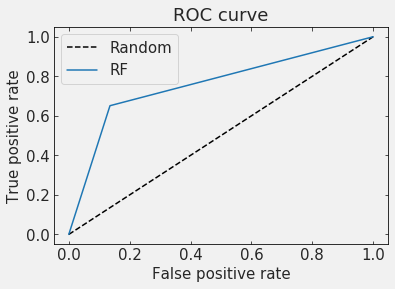

In [57]:
# The random forest model by itself
from sklearn.metrics import roc_curve
#y_pred_grd_rfcat = rf2.predict_proba(higgs_important_train)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(labeltest.flatten()=="s", rf2.predict(higgs_important_test))

pl.figure(1)
pl.plot([0, 1], [0, 1], 'k--', label = 'Random')
pl.plot(fpr_rf, tpr_rf, label='RF')
pl.xlabel('False positive rate')
pl.ylabel('True positive rate')
pl.title('ROC curve')
pl.legend(loc='best')
pl.show()


**Figure 5:** The plot shows the Receiver operating characteristic curve for our optimized random forest.The curve is above the random line, which represents what would happen if we take a random guess to predict our true posituve to false positive rate. This is a good sign for our model since we want it to be as close as possible to a True positive ratio of 1 and a false positive ratio of 0.